In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/daily-gold-price-historical-dataset/gold.csv


**EDA** 

In [2]:
df=pd.read_csv("/kaggle/input/daily-gold-price-historical-dataset/gold.csv")
df.head(5)


,Date,Open,High,Low,Close,Volume,Currency
0,2000-01-04,289.5,289.5,280.0,283.7,21621,USD
1,2000-01-05,283.7,285.0,281.0,282.1,25448,USD
2,2000-01-06,281.6,282.8,280.2,282.4,19055,USD
3,2000-01-07,282.5,284.5,282.0,282.9,11266,USD
4,2000-01-10,282.4,283.9,281.8,282.7,30603,USD


In [3]:
df.tail(5)

,Date,Open,High,Low,Close,Volume,Currency
5698,2022-08-29,1748.4,1757.90,1731.40,1749.7,156220,USD
5699,2022-08-30,1749.8,1752.80,1732.90,1736.3,130664,USD
5700,2022-08-31,1735.5,1738.00,1720.60,1726.2,176731,USD
5701,2022-09-01,1723.0,1723.00,1699.10,1709.3,198618,USD
5702,2022-09-02,1707.9,1729.45,1707.05,1723.0,0,USD


In [4]:
df.describe()

,Open,High,Low,Close,Volume
count,5703.000000,5703.000000,5703.000000,5703.000000,5703.000000
mean,1040.382816,1048.339181,1031.863169,1040.298282,139141.669297
std,518.733377,522.353946,514.455903,518.524020,102537.449058
min,256.600000,259.400000,255.100000,256.600000,0.000000
25%,459.850000,463.900000,457.450000,460.500000,52938.500000
50%,1188.800000,1198.000000,1179.700000,1188.700000,126006.000000
75%,1381.400000,1392.750000,1368.100000,1383.050000,193109.000000
max,2076.400000,2089.200000,2049.000000,2069.400000,816531.000000


In [5]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Close Prices Over Time')

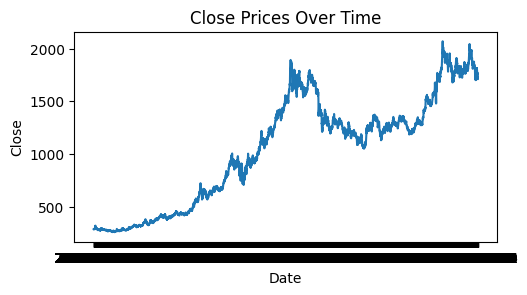

In [6]:
#line plot for close prices over time
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.lineplot(x='Date',y='Close',data=df)
plt.title("Close Prices Over Time")

Text(0.5, 1.0, 'Volume Distribution')

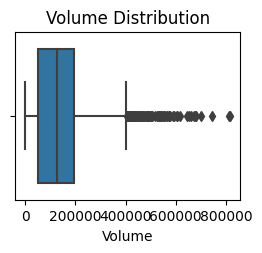

In [7]:
#Boxplot for volume
plt.subplot(2,2,2)
sns.boxplot(x='Volume',data=df)
plt.title("Volume Distribution")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

Text(0.5, 1.0, 'Candlestick Plot')

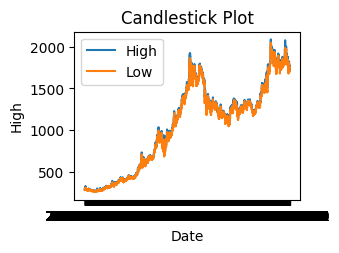

In [8]:
#Candlestick plot
plt.subplot(2,2,3)
sns.lineplot(x='Date',y='High',data=df,label='High')
sns.lineplot(x='Date',y='Low',data=df,label='Low')
plt.fill_between(df["Date"],df['Low'],df['High'],alpha=0.2)
plt.title('Candlestick Plot')


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Daily Price Changes')

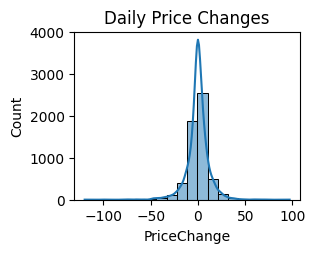

In [9]:
# Histogram of daily price changes
plt.subplot(2, 2, 4)
df['PriceChange'] = df['Close'] - df['Open']
sns.histplot(df['PriceChange'], bins=20, kde=True)
plt.title('Daily Price Changes')

**OUTLIER DETECTION USING Z-SCORE**

In [10]:
#Z-score based outlier detection
z_score=np.abs((df['Close']-df['Close'].mean())/df['Close'].std())
outliers=df[z_score>2]
outliers

,Date,Open,High,Low,Close,Volume,Currency,PriceChange


**LETS MAKE A MACHINE LEARNING MODEL**

In [11]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

X=df[['Open','High','Low','Volume']]
y=df['Close']


In [12]:
#Split data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#linear regression model
model=LinearRegression()


In [13]:
cv_scores=cross_val_score(model,X_train,y_train,cv=5,scoring='neg_mean_squared_error')
cv_scores

array([-17.4196501 , -23.23165016, -21.67692293, -21.23560584,
       -25.78271598])

In [14]:
np.mean(cv_scores)

-21.86930899963022

In [15]:
# Train the model on the full training set
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

In [16]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mse

21.987005900774214

**OUTLIER DETECTION USING IQR**

In [17]:
# Outlier Detection
Q1 = df['Close'].quantile(0.25)
Q3 = df['Close'].quantile(0.75)
IQR = Q3 - Q1
outliers = (df['Close'] < (Q1 - 1.5 * IQR)) | (df['Close'] > (Q3 + 1.5 * IQR))
outliers

0       False
1       False
2       False
3       False
4       False
        ...  
5698    False
5699    False
5700    False
5701    False
5702    False
Name: Close, Length: 5703, dtype: bool

In [18]:


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler



In [19]:
# Standardize features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

In [20]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42)

In [21]:
# Machine Learning Model (Random Forest Regressor)
modelr = RandomForestRegressor(random_state=42)

In [22]:
# Cross-validation
cv_scores = cross_val_score(modelr, X_standardized, y, cv=5, scoring='neg_mean_squared_error')
rmse_cv_scores = [abs(score)**0.5 for score in cv_scores]


In [23]:
rmse_cv_scores

[89.91570597858117,
 116.13840902673122,
 8.79554386194193,
 6.077262574692153,
 26.233271290950306]

In [24]:
sum(rmse_cv_scores)/len(rmse_cv_scores)

49.432038546579356

In [25]:
# Training the model on the training set
modelr.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [26]:
# Predictions on the testing set
y_pred = modelr.predict(X_test)

In [27]:
# Evaluation
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

6.332106064778143